In [1]:
import pandas as pd
import numpy as np
import string, re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 

import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usurper\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usurper\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Acquiring data

In [2]:
Messages = pd.read_csv('NLP data\\SMSSpamCollection.csv', sep = '\t', names = ['label', 'sms'])

# Data Wrangling

In [3]:
Messages.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Cleaning in 2 rounds

In [4]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [5]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [6]:
Messages['sms_cleaned'] = Messages.sms.apply(lambda x: clean_text_round1(x))
Messages['sms_cleaned'] = Messages['sms_cleaned'].apply(lambda x: clean_text_round1(x))

In [7]:
Messages.head()

,label,sms,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


### Spliting data into tokens

In [8]:
Messages['sms_tokens'] = Messages.sms_cleaned.apply(lambda x : x.split(' '))
Messages.head()

,label,sms,sms_cleaned,sms_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,"[free, entry, in, , a, wkly, comp, to, win, fa..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


### Deleting stopwords

In [9]:
stop_words   = set(stopwords.words('english'))

Messages['sms_without_stopword'] = 0

for idx, sms_tokens in enumerate(Messages.sms_tokens):
    filtered_sms = [sms for sms in sms_tokens if not sms in stop_words]
    Messages['sms_without_stopword'].iloc[idx] = filtered_sms
    pass
pass

C:\Users\Usurper\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Lemmatization

In [10]:
lemmatizer = WordNetLemmatizer() 

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

Messages['sms_lemmatized'] = Messages.sms_tokens.apply(lambda x : lemmatize_text(x))
Messages.head()

,label,sms,sms_cleaned,sms_tokens,sms_without_stopword,sms_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,"[free, entry, in, , a, wkly, comp, to, win, fa...","[free, entry, , wkly, comp, win, fa, cup, fina...","[free, entry, in, , a, wkly, comp, to, win, fa..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, i, dont, think, he, go, to, usf, he, lif..."


# Exploratory Data Analysis

In [11]:
Messages.describe()

,label,sms,sms_cleaned,sms_tokens,sms_without_stopword,sms_lemmatized
count,5572,5572,5572,5572,5572,5572
unique,2,5169,5101,5101,5084,5101
top,ham,"Sorry, I'll call later",sorry ill call later,"[sorry, ill, call, later]","[sorry, ill, call, later]","[sorry, ill, call, later]"
freq,4825,30,30,30,30,30


In [12]:
Messages.groupby('label').describe()

sms                                                                 \
      count unique                                                top freq   
label                                                                        
ham    4825   4516                             Sorry, I'll call later   30   
spam    747    653  Please call our customer service representativ...    4   

      sms_cleaned                                                            \
            count unique                                                top   
label                                                                         
ham          4825   4498                               sorry ill call later   
spam          747    604  u have a secret admirer who is looking  make c...   

           sms_tokens         \
      freq      count unique   
label                          
ham     30       4825   4498   
spam     6        747    604   

                                                               \
                                                     top freq   
label                                                           
ham                            [sorry, ill, call, later]   30   
spam   [u, have, a, secret, admirer, who, is, looking...    6   

      sms_without_stopword         \
                     count unique   
label                               
ham                   4825   4485   
spam                   747    600   

                                                              sms_lemmatized  \
                                                     top freq          count   
label                                                                          
ham                            [sorry, ill, call, later]   30           4825   
spam   [u, secret, admirer, looking, , make, contact,...    6            747   

                                                                      
      unique                                                top freq  
label                                                                 
ham     4498                          [sorry, ill, call, later]   30  
spam     604  [u, have, a, secret, admirer, who, is, looking...    6

# Data Engneering

In [13]:
Messages['length_cleaned'] = Messages.sms_without_stopword.apply(len)
Messages['length_brut']    = Messages.sms.apply(len)

# Data Visualization

In [14]:
all_sms = ' '
for elm in Messages.sms_cleaned:
    all_sms += (str(elm))
    pass
pass

In [15]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

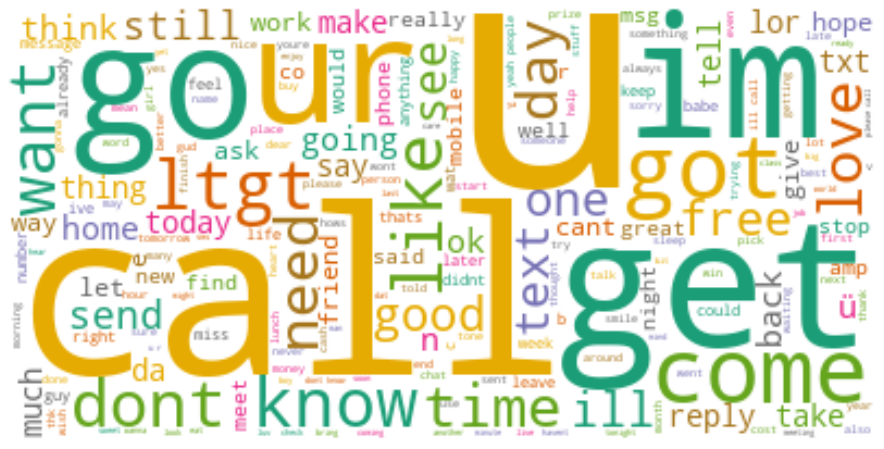

In [16]:
plt.figure(figsize = (18,8))
plt.imshow(wc.generate(all_sms), interpolation='bilinear')
plt.axis("off")
plt.show()

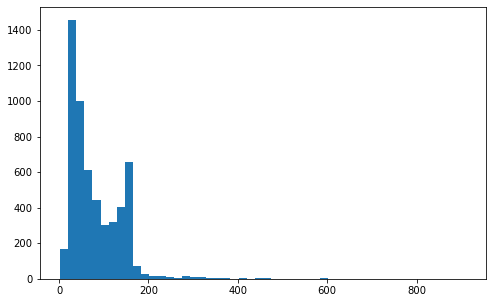

In [17]:
plt.figure(figsize = (8,5))
plt.hist(Messages.length_brut, bins = 50)
plt.show()

In [18]:
Messages.length_brut.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length_brut, dtype: float64

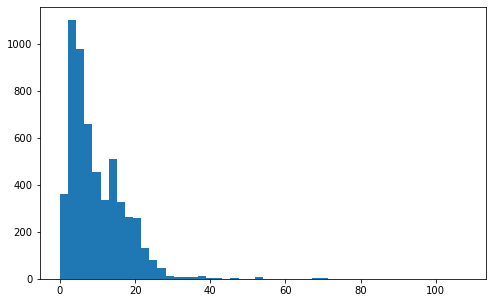

In [19]:
plt.figure(figsize = (8,5))
plt.hist(Messages.length_cleaned, bins = 50)
plt.show()

In [20]:
Messages.length_cleaned.describe()

count    5572.000000
mean        9.796482
std         7.366928
min         0.000000
25%         4.000000
50%         7.000000
75%        14.000000
max       108.000000
Name: length_cleaned, dtype: float64

<Figure size 864x576 with 0 Axes>

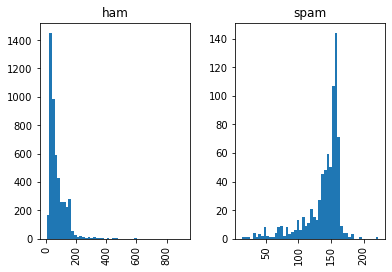

In [21]:
plt.figure(figsize = (12,8))
Messages.hist(column='length_brut', by='label', bins = 50)
plt.show()

<Figure size 864x576 with 0 Axes>

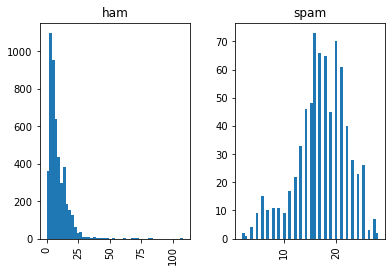

In [22]:
plt.figure(figsize = (12,8))
Messages.hist(column='length_cleaned', by='label', bins = 50)
plt.show()

# Document Term-Matrix

In [23]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(Messages.sms_cleaned)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = Messages.index
data_dtm

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Detection of spam

### Model Selection

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

spam_detect_model = cross_val_score(MultinomialNB(), data_dtm, Messages.label, cv = 4)
spam_detect_model.mean()

0.96356783919598

### Model Evaluation

In [38]:
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(data_dtm, Messages.label)
all_predictions = model.predict(data_dtm)

print (classification_report(Messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      4825
        spam       0.96      0.96      0.96       747

    accuracy                           0.99      5572
   macro avg       0.98      0.98      0.98      5572
weighted avg       0.99      0.99      0.99      5572



# Sentiment Analysis

In [42]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

Messages['polarity']     = Messages.sms_cleaned.apply(pol)
Messages['subjectivity'] = Messages.sms_cleaned.apply(sub)

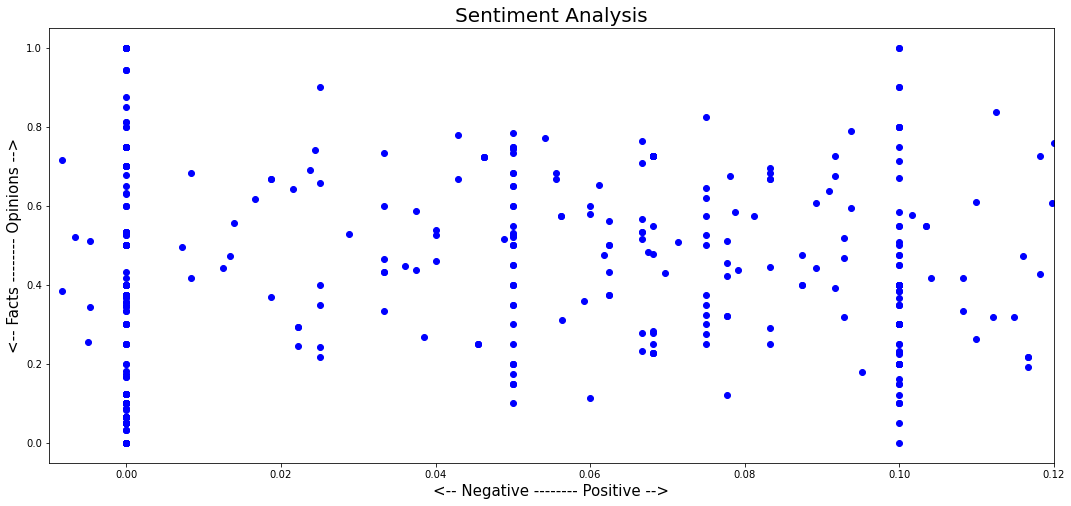

In [45]:
plt.figure(figsize = (18,8))
x = Messages.polarity
y = Messages.subjectivity
plt.scatter(x, y, color='blue')
plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()